# 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액
- https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE
- https://www.narastat.kr/metasvc/index.do?orgId=101&confmNo=101056&kosisYn=Y

## K-Beauty는 성장하고 있을까?
- e: 추정치, p: 잠정치, -: 자료없음, ...: 미상자료, x: 비밀보호, ▽: 시계열 불연 (단위: 백만원)

# 필요 라이브러리 가져오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import os
os.name

'nt'

In [3]:
if os.name == "posix":
    sns.set(font="AppleGothic")
elif os.name == "nt":
    sns.set(font="Malgun Gothic")

# 데이터 로드하기

In [4]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale.csv.zip",
                     encoding="cp949")
df_raw.shape

(450, 27)

In [5]:
df_raw.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '2014 1/4', '2014 2/4', '2014 3/4',
       '2014 4/4', '2015 1/4', '2015 2/4', '2015 3/4', '2015 4/4', '2016 1/4',
       '2016 2/4', '2016 3/4', '2016 4/4', '2017 1/4', '2017 2/4', '2017 3/4',
       '2017 4/4', '2018 1/4', '2018 2/4', '2018 3/4', '2018 4/4', '2019 1/4',
       '2019 2/4', '2019 3/4', '2019 4/4 p)'],
      dtype='object')

In [6]:
df_raw["국가(대륙)별"].value_counts()

국가(대륙)별
합계            45
미국            45
중국            45
일본            45
아세안(ASEAN)    45
EU            45
중동            45
중남미           45
대양주           45
기타            45
Name: count, dtype: int64

In [7]:
df_raw[df_raw["국가(대륙)별"] == "미국"].sample(5)

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4 p)
66,미국,의류 및 패션관련 상품,계,9810,7801,6404,9208,8602,6927,8055,...,11173,14483,11761,12125,10224,13664,12079,12990,12903,15352
63,미국,음반·비디오·악기,계,787,720,722,821,849,781,827,...,2281,2647,2362,3014,3932,4550,3857,5191,5757,4786
78,미국,음·식료품,계,381,415,405,673,577,628,631,...,417,265,277,311,239,276,336,313,601,424
65,미국,음반·비디오·악기,면세점 이외,-,-,-,-,-,-,-,...,2281,2647,2362,3014,3932,4550,3857,5191,5757,4786
83,미국,농축수산물,면세점 이외,-,-,-,-,-,-,-,...,0,2,1,0,0,33,2,2,7,2


# 분석과 시각화를 위한 tidy data 만들기

In [8]:
df_raw.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '2014 1/4', '2014 2/4', '2014 3/4',
       '2014 4/4', '2015 1/4', '2015 2/4', '2015 3/4', '2015 4/4', '2016 1/4',
       '2016 2/4', '2016 3/4', '2016 4/4', '2017 1/4', '2017 2/4', '2017 3/4',
       '2017 4/4', '2018 1/4', '2018 2/4', '2018 3/4', '2018 4/4', '2019 1/4',
       '2019 2/4', '2019 3/4', '2019 4/4 p)'],
      dtype='object')

In [9]:
df_raw.values

array([['합계', '합계', '계', ..., 1338103, 1517805, 1860640],
       ['합계', '합계', '면세점', ..., 1157158, 1336372, 1645003],
       ['합계', '합계', '면세점 이외', ..., 180945, 181433, 215637],
       ...,
       ['기타', '기 타', '계', ..., 689, 469, 1094],
       ['기타', '기 타', '면세점', ..., 1, 0, 1],
       ['기타', '기 타', '면세점 이외', ..., 688, 469, 1093]], dtype=object)

In [10]:
df_raw.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별"], var_name="기간", value_name="백만원")
# 나머지 행들이 variable에, values에 들은 값들이 value에 들어감

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-
...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4 p),0
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4 p),531
10797,기타,기 타,계,2019 4/4 p),1094
10798,기타,기 타,면세점,2019 4/4 p),1


In [11]:
df = df_raw.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별"], var_name="기간", value_name="백만원")
df.shape

(10800, 5)

In [12]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  10800 non-null  object
 1   상품군별     10800 non-null  object
 2   판매유형별    10800 non-null  object
 3   기간       10800 non-null  object
 4   백만원      10800 non-null  object
dtypes: object(5)
memory usage: 422.0+ KB


# 데이터 전처리

## 기간에서 연도를 분리하기

In [14]:
int("2019 4/4 p".split()[0])

2019

In [15]:
df["연도"] = df["기간"].map(lambda x: int(x.split()[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
0,합계,합계,계,2014 1/4,148272,2014
1,합계,합계,면세점,2014 1/4,-,2014
2,합계,합계,면세점 이외,2014 1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014


In [16]:
int("2019 1/4 p".split()[1].split('/')[0])

1

In [17]:
# 기간에서 분기만 변경하기
df["분기"] = df["기간"].map(lambda x: int(x.split()[1].split('/')[0]))
df.sample(5)

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
1539,아세안(ASEAN),소프트웨어,계,2014 4/4,27,2014,4
8936,대양주,스포츠·레저용품,면세점 이외,2018 4/4,100,2018,4
4014,기타,소프트웨어,계,2016 1/4,73,2016,1
8685,일본,합계,계,2018 4/4,50469,2018,4
5112,일본,화장품,계,2016 4/4,4034,2016,4


## 금액을 수치데이터로 표현하기

In [18]:
# 문자를 결측치로 변경하고 float 타입으로 변경하기
df["백만원"] = df["백만원"].replace("-", np.nan).astype(float)
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272.0,2014,1
1,합계,합계,면세점,2014 1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014 1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1


## 필요없는 데이터 제거하기

In [19]:
# 합계 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거합니다.

df = df[(df["국가(대륙)별"] != "합계") & (df["상품군별"] != "합계")].copy()
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,NaN,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
52,미국,가전·전자·통신기기,면세점,2014 1/4,NaN,2014,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9072 entries, 48 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  9072 non-null   object 
 1   상품군별     9072 non-null   object 
 2   판매유형별    9072 non-null   object 
 3   기간       9072 non-null   object 
 4   백만원      6048 non-null   float64
 5   연도       9072 non-null   int64  
 6   분기       9072 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 567.0+ KB


In [21]:
# 결측치 보기
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        3024
연도            0
분기            0
dtype: int64

# K-Beauty 시각화

## 전체 상품군 판매액

In [22]:
# 판매유형별 == "계" 데이터만 가져와서 봐야함
df_total = df[df["판매유형별"] == "계"].copy()
df_total.copy()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1
...,...,...,...,...,...,...,...
10785,기타,아동·유아용품,계,2019 4/4 p),192.0,2019,4
10788,기타,음·식료품,계,2019 4/4 p),315.0,2019,4
10791,기타,농축수산물,계,2019 4/4 p),2.0,2019,4
10794,기타,생활용품 및 자동차용품,계,2019 4/4 p),531.0,2019,4


<Axes: xlabel='연도', ylabel='백만원'>

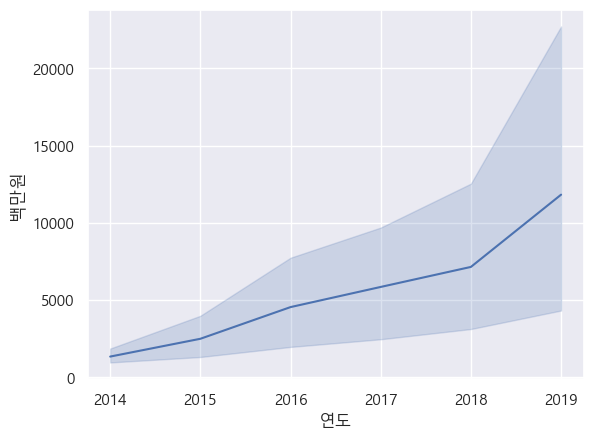

In [23]:
sns.lineplot(data=df_total, x="연도", y="백만원")

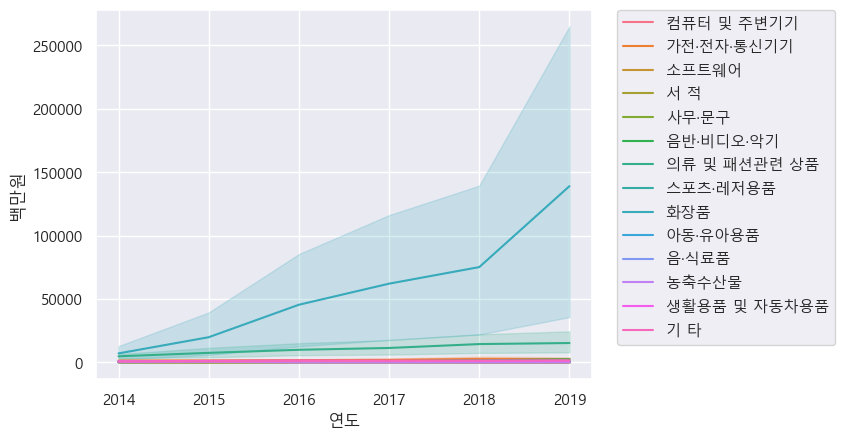

In [24]:
sns.lineplot(data=df_total, x="연도", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

c:\Users\um_se\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


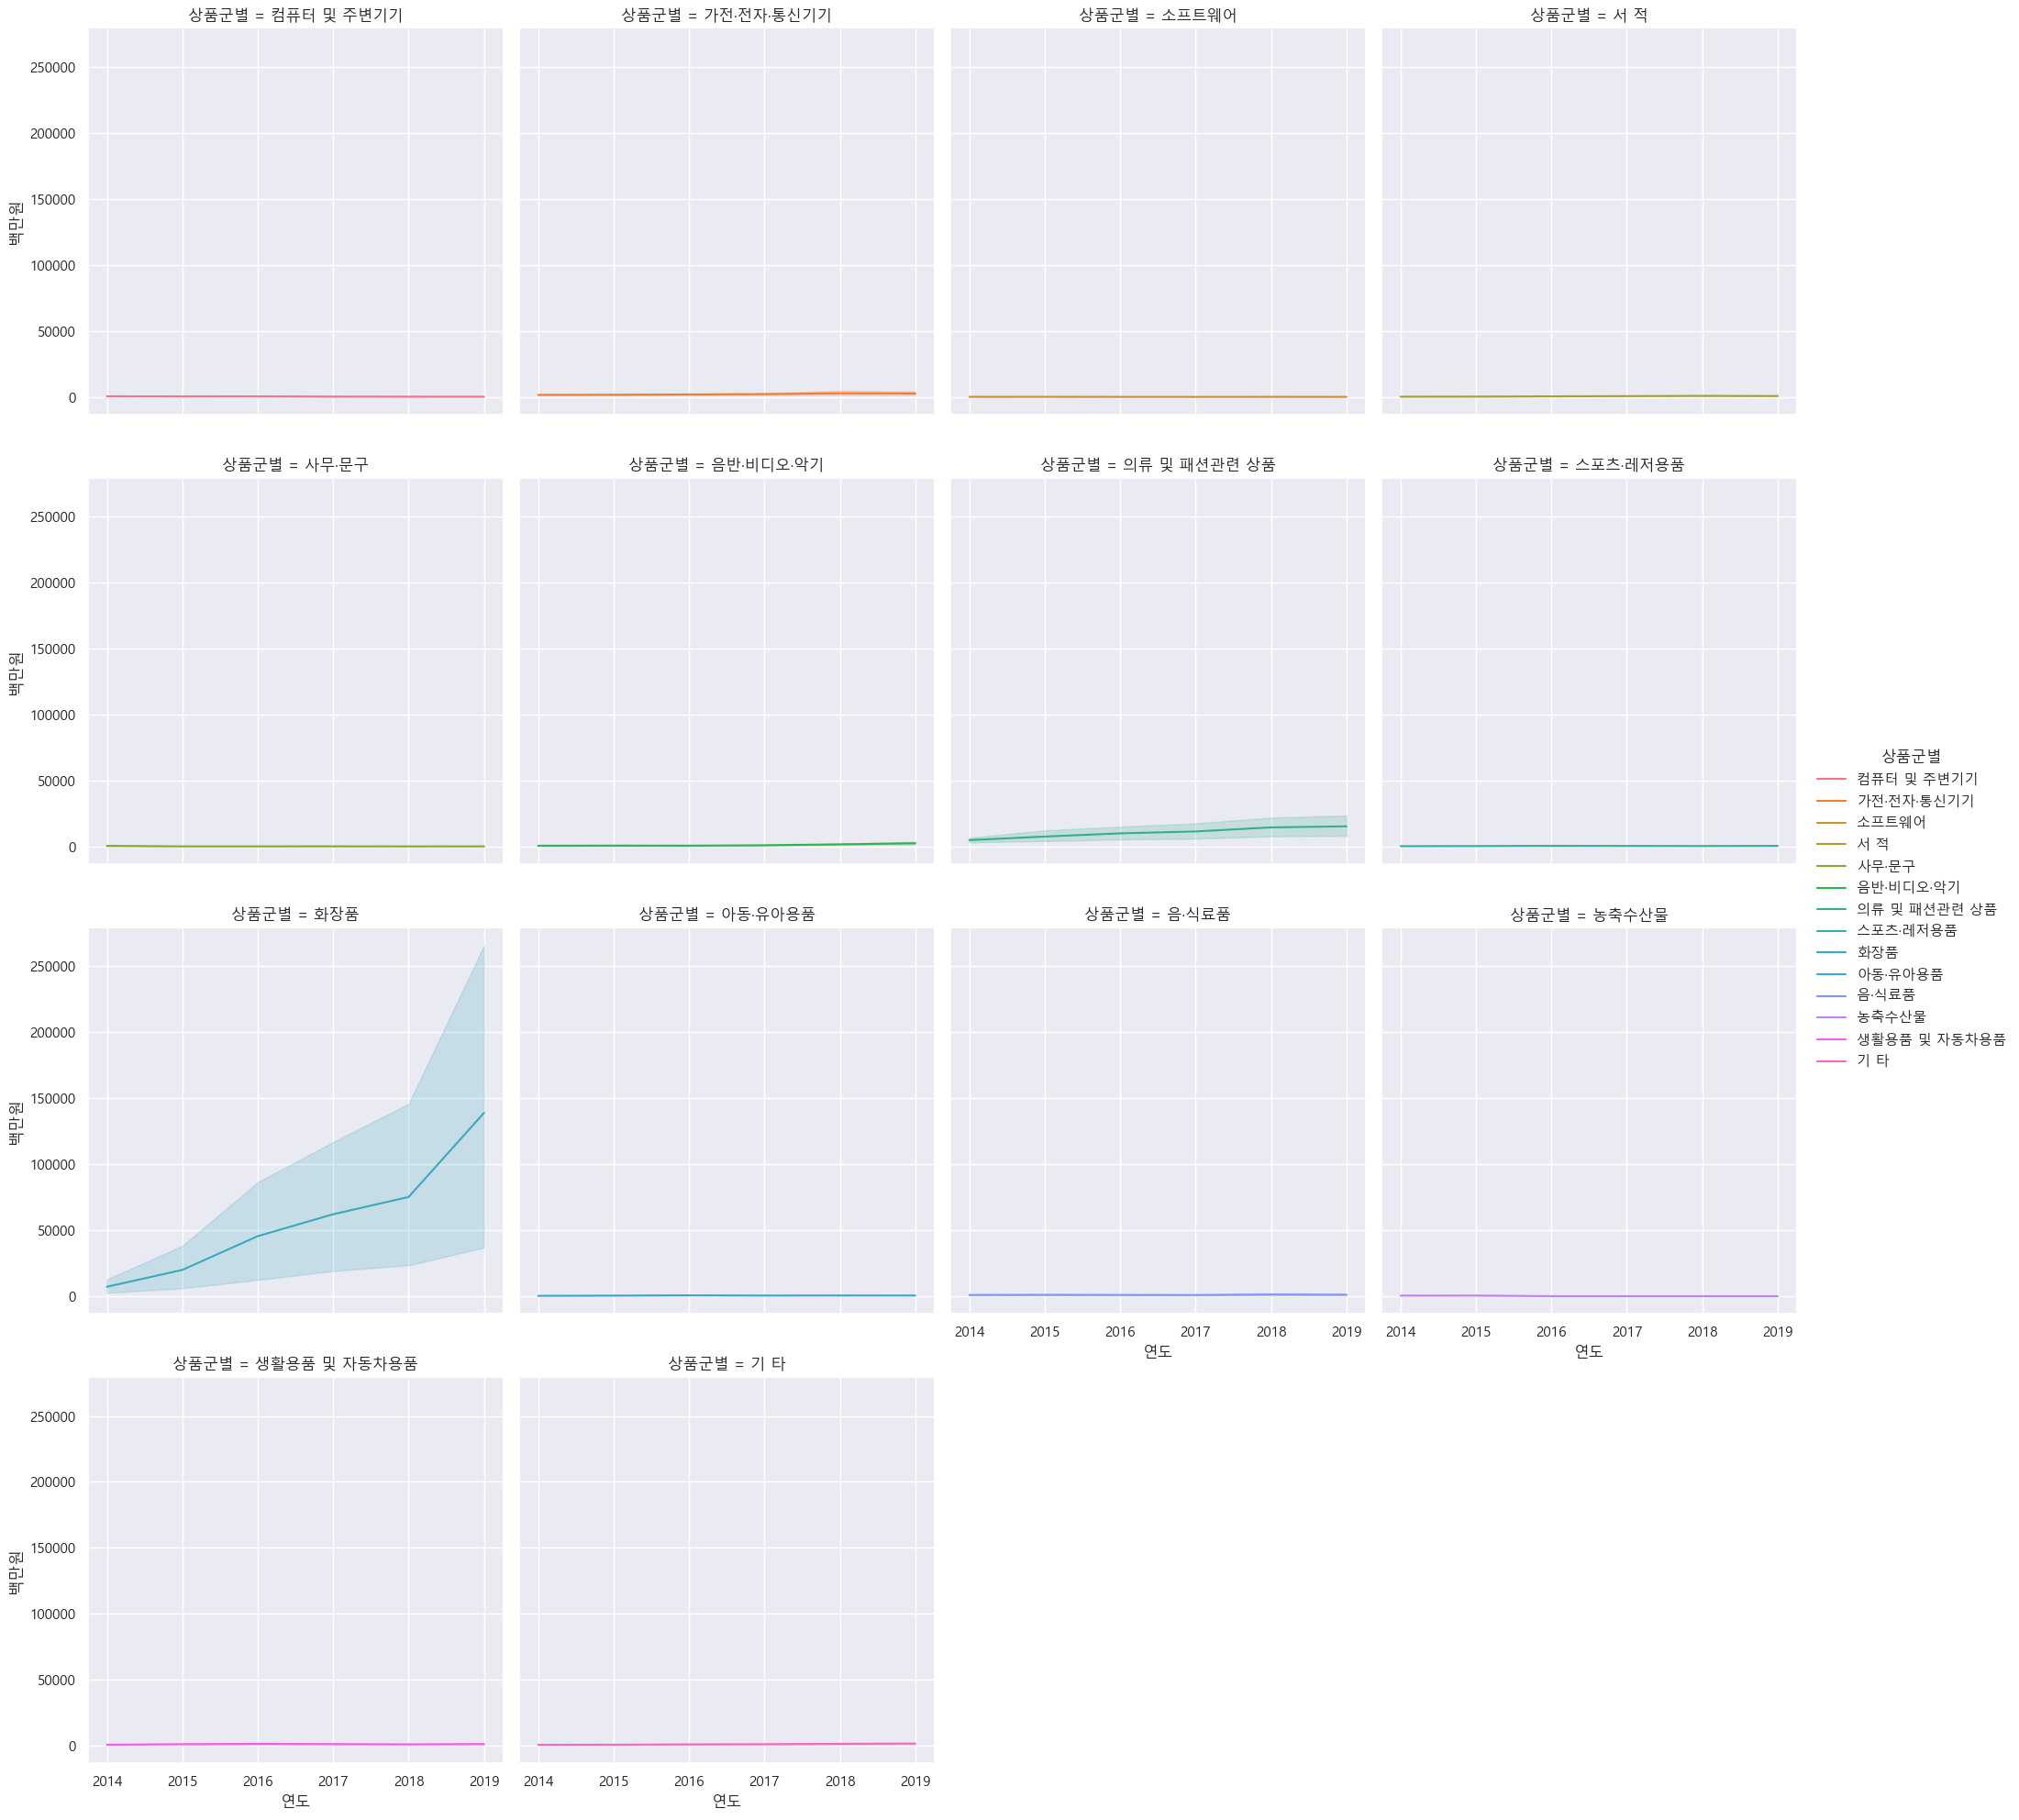

In [25]:
sns.relplot(data=df_total, x="연도", y="백만원", 
            hue="상품군별", kind="line", col="상품군별", col_wrap=4)

In [26]:
df_sub = df_total[~df_total["상품군별"].isin(["화장품", "의류 및 패션관련 상품"])].copy()

c:\Users\um_se\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


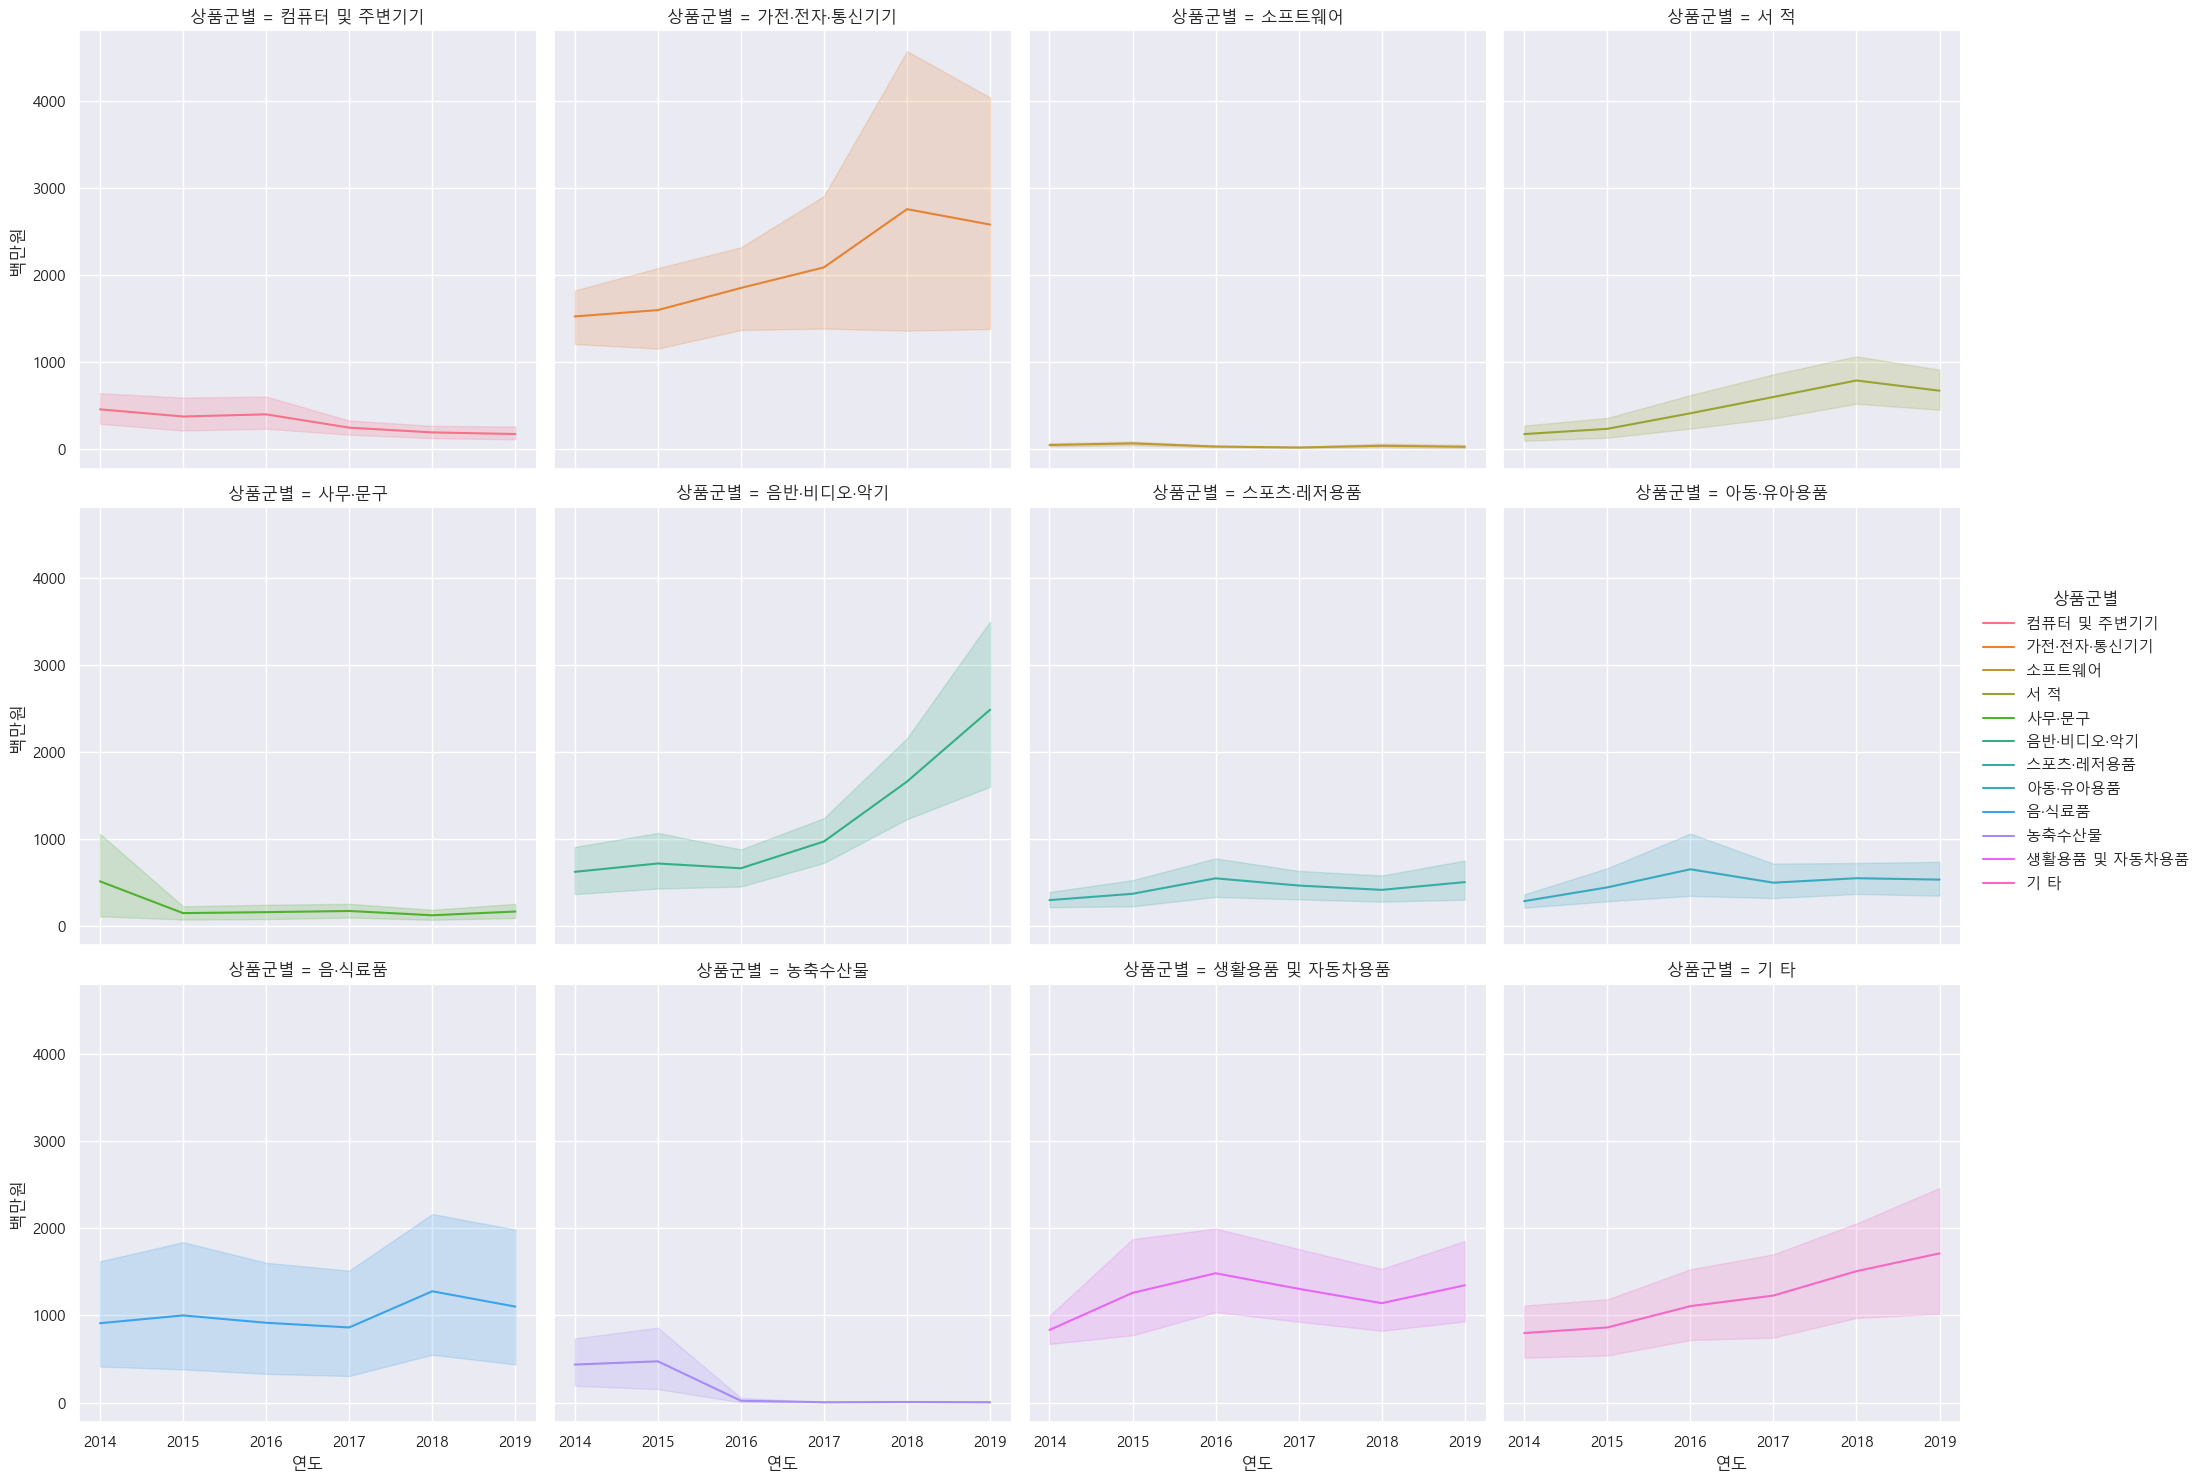

In [27]:
sns.relplot(data=df_sub, x="연도", y="백만원", 
            hue="상품군별", kind="line", col="상품군별", col_wrap=4)

## 화장품의 온라인 쇼핑 해외직접판매액

In [28]:
df_cosmetic = df_total[df_total["상품군별"] == "화장품"].copy()
df_cosmetic["상품군별"].unique()

array(['화장품'], dtype=object)

<Axes: xlabel='연도', ylabel='백만원'>

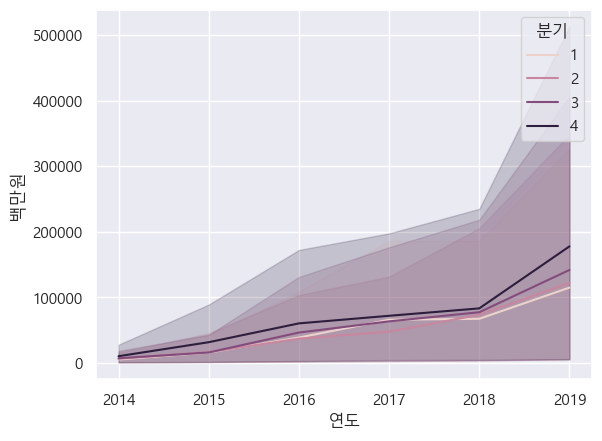

In [29]:
sns.lineplot(data = df_cosmetic, x="연도", y="백만원", hue="분기")

<Axes: xlabel='기간', ylabel='백만원'>

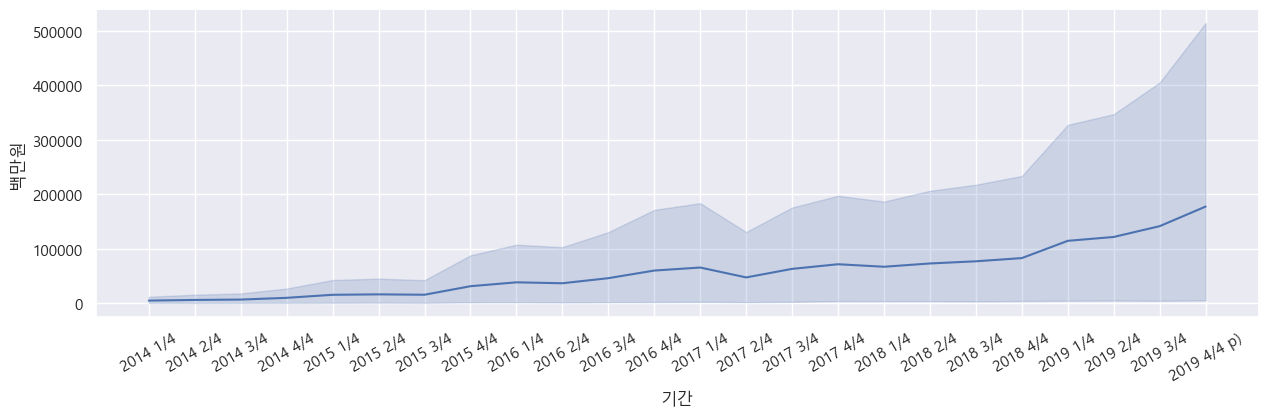

In [30]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="백만원")

In [31]:
df_cosmetic.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
72,미국,화장품,계,2014 1/4,3740.0,2014,1
117,중국,화장품,계,2014 1/4,32235.0,2014,1
162,일본,화장품,계,2014 1/4,1034.0,2014,1
207,아세안(ASEAN),화장품,계,2014 1/4,398.0,2014,1
252,EU,화장품,계,2014 1/4,937.0,2014,1


<Axes: xlabel='기간', ylabel='백만원'>

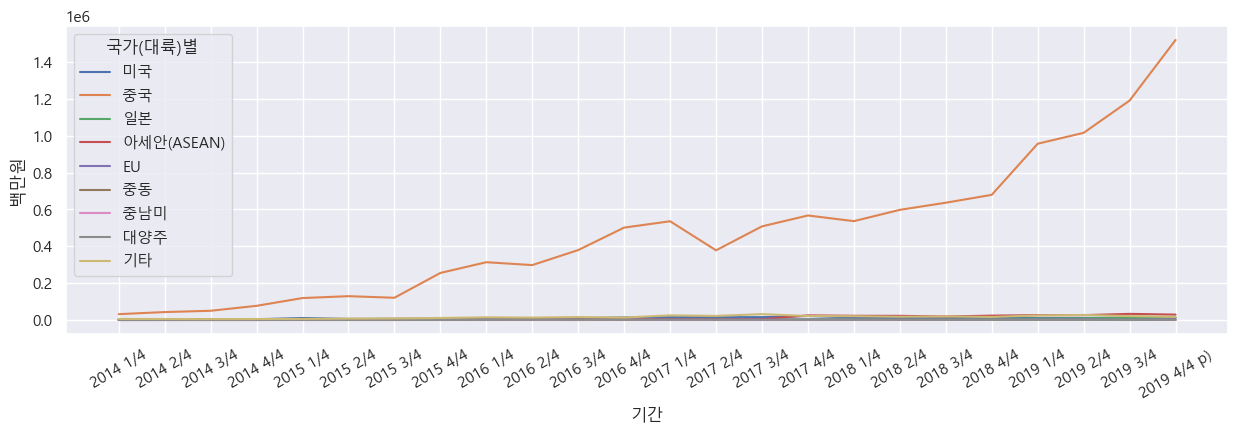

In [32]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="백만원", hue="국가(대륙)별")

<Axes: xlabel='기간', ylabel='백만원'>

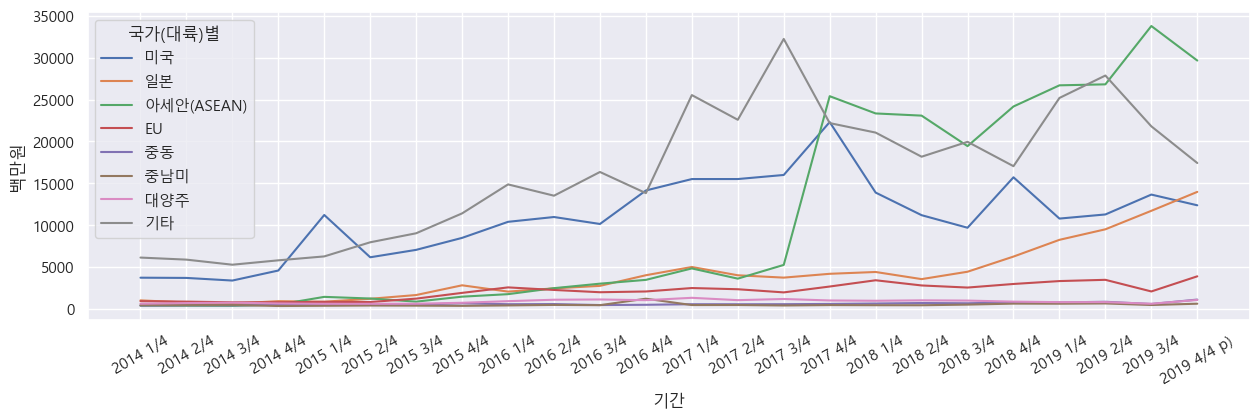

In [33]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic[df_cosmetic["국가(대륙)별"] != "중국"], x="기간", y="백만원", hue="국가(대륙)별")

<Axes: xlabel='기간', ylabel='백만원'>

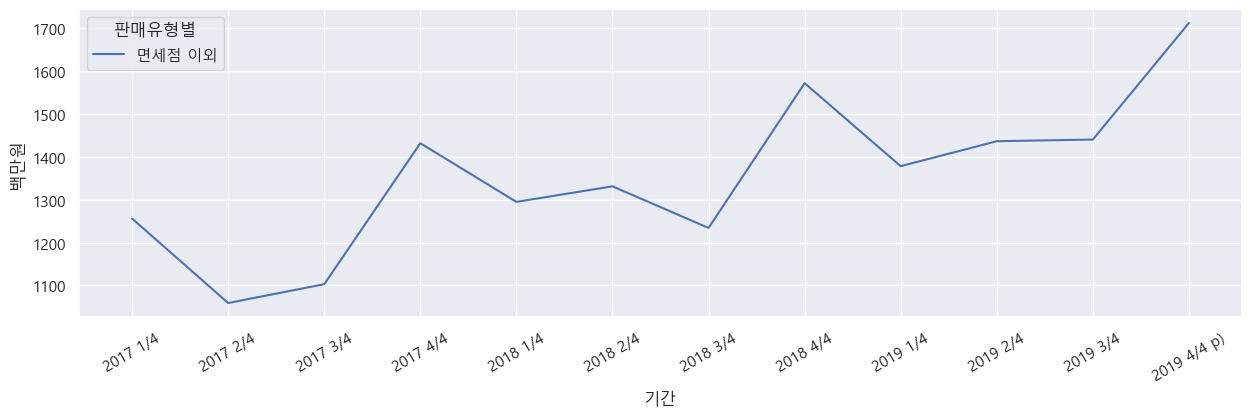

In [34]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
df_sub = df[(df["판매유형별"] != "계") & (df["판매유형별"] != "면세점")].copy()
sns.lineplot(data=df_sub, x="기간", y="백만원", hue="판매유형별", errorbar=None)

## 의류 및 패션관련 상품 온라인쇼핑 해외직접판매액

In [35]:
df_fashion = df[(df["상품군별"] == "의류 및 패션관련 상품") & (df["판매유형별"] == "계")].copy()
df_fashion.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션관련 상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션관련 상품,계,2014 1/4,12206.0,2014,1
156,일본,의류 및 패션관련 상품,계,2014 1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션관련 상품,계,2014 1/4,3473.0,2014,1
246,EU,의류 및 패션관련 상품,계,2014 1/4,1364.0,2014,1


<Axes: xlabel='기간', ylabel='백만원'>

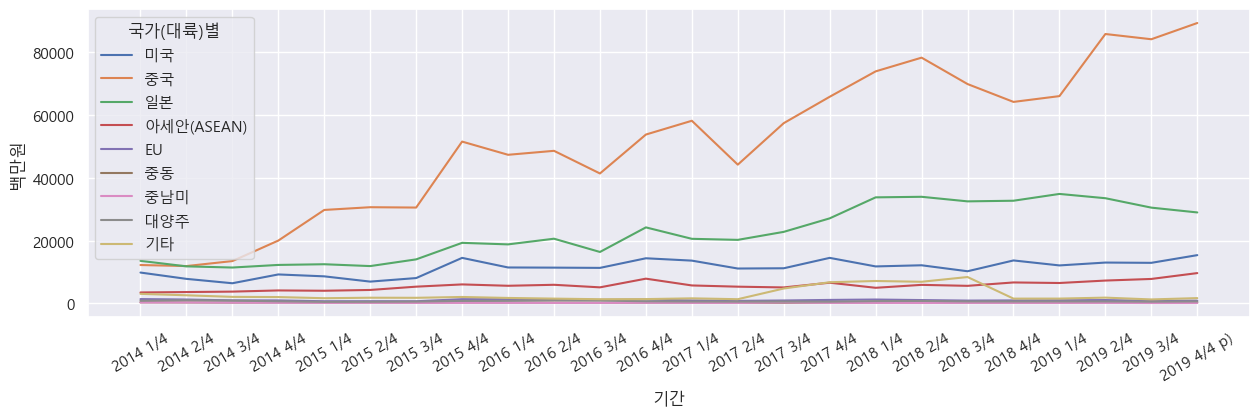

In [36]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x="기간", y="백만원", hue="국가(대륙)별")

<Axes: xlabel='기간', ylabel='백만원'>

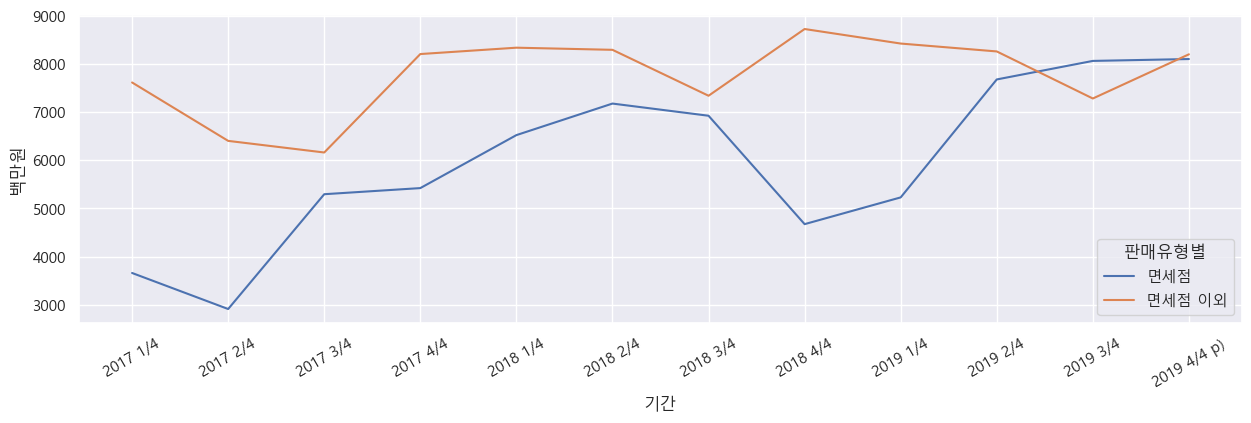

In [37]:
df_fashion2 = df[(df["상품군별"] == "의류 및 패션관련 상품") & (df["판매유형별"] != "계")].copy()

plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion2, x="기간", y="백만원", hue="판매유형별", errorbar=None)

## 데이터 집계하기

In [38]:
df_fashion.head(2)

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션관련 상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션관련 상품,계,2014 1/4,12206.0,2014,1


In [39]:
result = df_fashion.pivot_table(index="국가(대륙)별", columns="연도", values="백만원", aggfunc="sum")
result

연도,2014,2015,2016,2017,2018,2019
국가(대륙)별,,,,,,
EU,4485.0,3374.0,4899.0,3736.0,4102.0,3695.0
기타,9683.0,7248.0,5918.0,14387.0,23893.0,6275.0
대양주,3392.0,2349.0,3401.0,2266.0,2721.0,2381.0
미국,33223.0,38066.0,48451.0,50353.0,47774.0,53324.0
아세안(ASEAN),14936.0,19639.0,24478.0,22671.0,23086.0,31155.0
일본,48960.0,57594.0,79905.0,90584.0,132808.0,127722.0
중국,57531.0,142339.0,190932.0,225407.0,285998.0,325018.0
중남미,975.0,616.0,649.0,762.0,576.0,543.0
중동,1172.0,1018.0,968.0,772.0,879.0,924.0


## 연산결과를 시각적으로 보기

<Axes: xlabel='연도', ylabel='국가(대륙)별'>

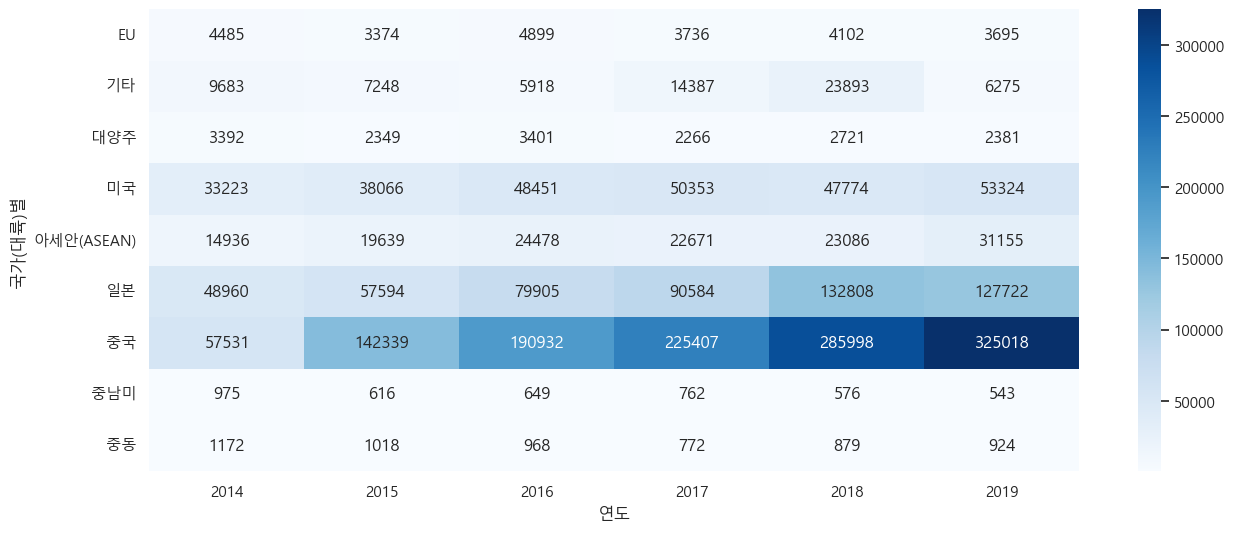

In [40]:
plt.figure(figsize=(15, 6))
sns.heatmap(result, cmap="Blues", annot=True, fmt=".0f")

# 전체 상품군별로 온라인쇼핑 해외직접판매액은 증가했을까?

In [41]:
df_total

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1
...,...,...,...,...,...,...,...
10785,기타,아동·유아용품,계,2019 4/4 p),192.0,2019,4
10788,기타,음·식료품,계,2019 4/4 p),315.0,2019,4
10791,기타,농축수산물,계,2019 4/4 p),2.0,2019,4
10794,기타,생활용품 및 자동차용품,계,2019 4/4 p),531.0,2019,4


<Axes: xlabel='연도', ylabel='백만원'>

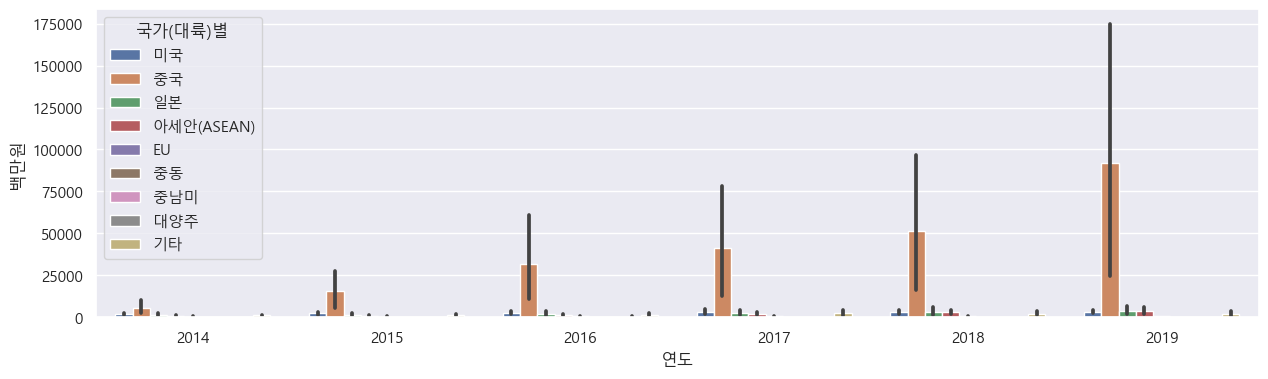

In [42]:
plt.figure(figsize=(15, 4))
sns.barplot(data=df_total, x="연도", y="백만원", hue="국가(대륙)별")

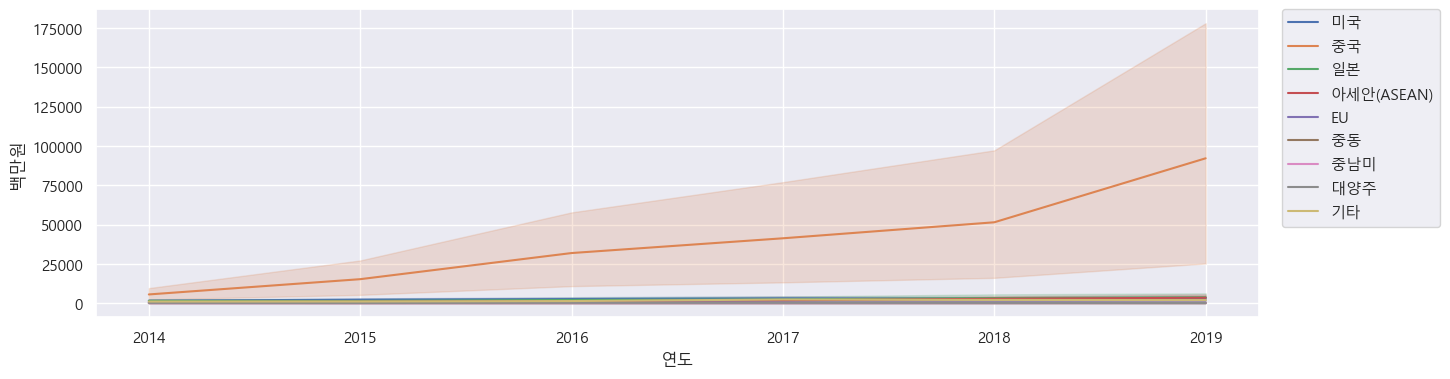

In [43]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_total, x="연도", y="백만원", hue="국가(대륙)별")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0,)

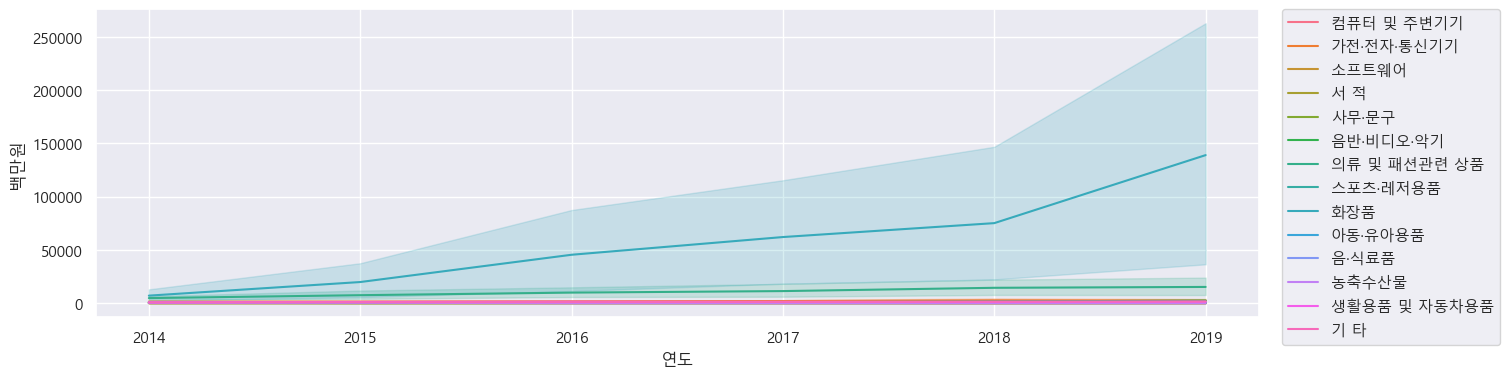

In [44]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_total, x="연도", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0,)